In [1]:
import pandas as pd
import numpy as np

## `merge` (두 개 이상의 데이터프레임을 join, 연결)

In [2]:
df1 = pd.DataFrame({
    '품종': ['setosa', 'setosa', 'virginica', 'virginica'],
    '꽃잎길이': [1.4, 1.3, 1.5, 1.3]},
    columns=['품종', '꽃잎길이'])
df1

,품종,꽃잎길이
0,setosa,1.4
1,setosa,1.3
2,virginica,1.5
3,virginica,1.3


In [3]:
df1.품종.value_counts() # 종류 2개

setosa       2
virginica    2
Name: 품종, dtype: int64

In [4]:
df2 = pd.DataFrame({
    '품종': ['setosa', 'virginica', 'virginica', 'versicolor'],
    '꽃잎너비': [0.4, 0.3, 0.5, 0.3]},
    columns=['품종', '꽃잎너비'])
df2

,품종,꽃잎너비
0,setosa,0.4
1,virginica,0.3
2,virginica,0.5
3,versicolor,0.3


In [5]:
df2.품종.value_counts() # 종류 2개

virginica     2
setosa        1
versicolor    1
Name: 품종, dtype: int64

In [6]:
# 공통을 존재하는 컬럼: 품종
# 같은 열에 동일한 원소가 여러개일 때, 원소들끼리의 모든 경우의 수를 조합
# sql에서 크로스하는 결과와 같다.
pd.merge(df1, df2) 

,품종,꽃잎길이,꽃잎너비
0,setosa,1.4,0.4
1,setosa,1.3,0.4
2,virginica,1.5,0.3
3,virginica,1.5,0.5
4,virginica,1.3,0.3
5,virginica,1.3,0.5


In [7]:
# 두 df 에서 이름이 같은 열은 모두 연결하는 기준 (키=on)
# 이름은 같아도 키가 안되는 열(이름의 의미가 다름) -> on  무없을 기준으로 할지 명시
# (학생) 수업ID / 이름 (학생의 이름)
# (수업) 수업ID / 이름 (수업의 이름)
# -> on=[수업ID, 이름]
df1 = pd.DataFrame({
    '고객명': ['춘향', '춘향', '몽룡'],
    '날짜': ['2018-01-01', '2018-01-02', '2018-01-01'],
    '데이터': ['20000', '30000', '100000']})
df1

,고객명,날짜,데이터
0,춘향,2018-01-01,20000
1,춘향,2018-01-02,30000
2,몽룡,2018-01-01,100000


In [8]:
df2 = pd.DataFrame({
    '고객명': ['춘향', '몽룡'],
    '데이터': ['여자', '남자']})
df2

,고객명,데이터
0,춘향,여자
1,몽룡,남자


In [9]:
pd.merge(df1, df2) # 고객명과 데이터를 동시에 일치 없음

,고객명,날짜,데이터


In [10]:
pd.merge(df1,df2,on='고객명') # 겹치는 이름을 가진 컬럼을 알아서 불러줌(x,y 붙여서)

,고객명,날짜,데이터_x,데이터_y
0,춘향,2018-01-01,20000,여자
1,춘향,2018-01-02,30000,여자
2,몽룡,2018-01-01,100000,남자


### 연결하는 기준이 되는 열들의 이름이 다를때

In [11]:
df1 = pd.DataFrame({
    '이름': ['영희', '철수', '철수'],
    '성적': [1, 2, 3]})
df1

,이름,성적
0,영희,1
1,철수,2
2,철수,3


In [12]:
df2 = pd.DataFrame({
    '성명': ['영희', '영희', '철수'],
    '성적2': [4, 5, 6]})
df2 # df2['이름'] = df2['성명'], df2.drop...['성명']??, rename...#직접 바꿀때 쓸 수 있는 방법

,성명,성적2
0,영희,4
1,영희,5
2,철수,6


In [13]:
try:
    pd.merge(df1, df2) # common columns X
except Exception as e:
    print(type(e))
    print(e)

<class 'pandas.errors.MergeError'>
No common columns to perform merge on. Merge options: left_on=None, right_on=None, left_index=False, right_index=False


In [14]:
pd.merge(df1, df2, left_on='이름', right_on='성명') # 이름과 성명 연결

,이름,성적,성명,성적2
0,영희,1,영희,4
1,영희,1,영희,5
2,철수,2,철수,6
3,철수,3,철수,6


In [15]:
pd.merge(df1, df2, left_on='이름', right_on='성명').drop('성명',axis=1)

,이름,성적,성적2
0,영희,1,4
1,영희,1,5
2,철수,2,6
3,철수,3,6


### 인덱스를 기준으로 합치고 싶을때

In [16]:
df1 = pd.DataFrame({
    '도시': ['서울', '서울', '서울', '부산', '부산'],
    '연도': [2000, 2005, 2010, 2000, 2005],
    '인구': [9853972, 9762546, 9631482, 3655437, 3512547]})
df1

,도시,연도,인구
0,서울,2000,9853972
1,서울,2005,9762546
2,서울,2010,9631482
3,부산,2000,3655437
4,부산,2005,3512547


In [17]:
df2 = pd.DataFrame(
    np.arange(12).reshape((6, 2)),
    index=[['부산', '부산', '서울', '서울', '서울', '서울'],
           [2000, 2005, 2000, 2005, 2010, 2015]],
    columns=['데이터1', '데이터2'])
df2

데이터1  데이터2
부산 2000     0     1
   2005     2     3
서울 2000     4     5
   2005     6     7
   2010     8     9
   2015    10    11

In [18]:
pd.merge(df1, df2, left_on=['도시', '연도'], right_index=True)

,도시,연도,인구,데이터1,데이터2
0,서울,2000,9853972,4,5
1,서울,2005,9762546,6,7
2,서울,2010,9631482,8,9
3,부산,2000,3655437,0,1
4,부산,2005,3512547,2,3


In [19]:
df2.reset_index()

,level_0,level_1,데이터1,데이터2
0,부산,2000,0,1
1,부산,2005,2,3
2,서울,2000,4,5
3,서울,2005,6,7
4,서울,2010,8,9
5,서울,2015,10,11


In [20]:
pd.merge(df1, df2.reset_index(),
         left_on=['도시', '연도'],
         right_on=['level_0', 'level_1']) # merge는 공통 열을 찾음

,도시,연도,인구,level_0,level_1,데이터1,데이터2
0,서울,2000,9853972,서울,2000,4,5
1,서울,2005,9762546,서울,2005,6,7
2,서울,2010,9631482,서울,2010,8,9
3,부산,2000,3655437,부산,2000,0,1
4,부산,2005,3512547,부산,2005,2,3


### `join`을 통한 합성

In [21]:
df1 = pd.DataFrame({
    '품종': ['setosa', 'setosa', 'virginica', 'virginica'],
    '꽃잎길이': [1.4, 1.3, 1.5, 1.3]},
    columns=['품종', '꽃잎길이'])
df1

,품종,꽃잎길이
0,setosa,1.4
1,setosa,1.3
2,virginica,1.5
3,virginica,1.3


In [22]:
df2 = pd.DataFrame({
    '품종': ['setosa', 'virginica', 'virginica', 'versicolor'],
    '꽃잎너비': [0.4, 0.3, 0.5, 0.3]},
    columns=['품종', '꽃잎너비'])
df2

,품종,꽃잎너비
0,setosa,0.4
1,virginica,0.3
2,virginica,0.5
3,versicolor,0.3


In [23]:
try:
    df1.join(df2)
except Exception as e:
    print(type(e))
    print(e)

<class 'ValueError'>
columns overlap but no suffix specified: Index(['품종'], dtype='object')


In [24]:
# dataframe 호출해서 left
df1.join(df2, lsuffix='l') # 행을 기준으로 합침 #보강 필요

,품종l,꽃잎길이,품종,꽃잎너비
0,setosa,1.4,setosa,0.4
1,setosa,1.3,virginica,0.3
2,virginica,1.5,virginica,0.5
3,virginica,1.3,versicolor,0.3


In [25]:
df1.join(df2, lsuffix='l', rsuffix='r') # 행을 기준으로 합쳐줌 

,품종l,꽃잎길이,품종r,꽃잎너비
0,setosa,1.4,setosa,0.4
1,setosa,1.3,virginica,0.3
2,virginica,1.5,virginica,0.5
3,virginica,1.3,versicolor,0.3


 `merge`
- 두 데이터프레임 사이의 크기가 같을 필요가 없음 (기준이 되는 열, 인덱스를 바탕으로 outer, inner... 내용들을 재구성
- `on` ... -> 어떠한 열을 기준으로 해줄까? `index`...
- 두 개의 데이터가 공통 분모만 있다면 (키) 연결
- 열 기준으로 연결할 필요가 없다? `join` -> 인덱스를 기준

## `concat`
* `merge` : 특정한 열을 기준(또는 인덱스)으로 해서 연결
* `concat` : 기준 열을 사용하지 않고 데이터를 연결(붙임) - np.concatenate, vstack, hstack, ...

In [26]:
s1 = pd.Series([0, 1], index=['A','B'])
s2 = pd.Series([2, 3, 4], index=['A', 'B', 'C'])

In [27]:
s1

A    0
B    1
dtype: int64

In [28]:
s2

A    2
B    3
C    4
dtype: int64

In [29]:
# pd.concat
pd.concat([s1, s2]) # axis=0 위아래로
pd.concat([s1, s2], axis=0)

A    0
B    1
A    2
B    3
C    4
dtype: int64

In [30]:
pd.concat([s1, s2], axis=1) # s1은 2개여서 nan 붙음, 열기준

,0,1
A,0.0,2
B,1.0,3
C,NaN,4


# 피벗 테이블과 그룹 분석

## 피봇테이블
* Pivot Table : 데이터 열 중에서 두 개의 열을 각각 행과 열 인덱스로 사용해서 데이터를 조회한 결과
* 엑셀 -> 피봇테이블
* Pandas -> 피봇테이블 `pivot` (행 인덱스로 사용할 열이름, 열 인덱스로 사용할 열 이름)

In [31]:
data = {
    "도시": ["서울", "서울", "서울", "부산", "부산", "부산", "인천", "인천"],
    "연도": ["2015", "2010", "2005", "2015", "2010", "2005", "2015", "2010"],
    "인구": [9904312, 9631482, 9762546, 3448737, 3393191, 3512547, 2890451, 263203],
    "지역": ["수도권", "수도권", "수도권", "경상권", "경상권", "경상권", "수도권", "수도권"]
}
columns = ["도시", "연도", "인구", "지역"]

In [32]:
df1 = pd.DataFrame(data, columns=columns)
df1

,도시,연도,인구,지역
0,서울,2015,9904312,수도권
1,서울,2010,9631482,수도권
2,서울,2005,9762546,수도권
3,부산,2015,3448737,경상권
4,부산,2010,3393191,경상권
5,부산,2005,3512547,경상권
6,인천,2015,2890451,수도권
7,인천,2010,263203,수도권


In [33]:
# 행인덱스, 열인덱스로 묶어줄 데이터 순서대로 입력
df1.pivot('도시','연도','인구') # 인덱스별 값이 없으면 nan (결측치)

연도,2005,2010,2015
도시,,,
부산,3512547.0,3393191.0,3448737.0
서울,9762546.0,9631482.0,9904312.0
인천,NaN,263203.0,2890451.0


In [34]:
df1.set_index(['도시', '연도'])['인구'] # 시리즈 형태

도시  연도  
서울  2015    9904312
    2010    9631482
    2005    9762546
부산  2015    3448737
    2010    3393191
    2005    3512547
인천  2015    2890451
    2010     263203
Name: 인구, dtype: int64

In [35]:
df1.set_index(['도시', '연도'])[['인구']] #데이터프레임 형태

인구
도시 연도           
서울 2015  9904312
   2010  9631482
   2005  9762546
부산 2015  3448737
   2010  3393191
   2005  3512547
인천 2015  2890451
   2010   263203

In [36]:
try:
    df1.pivot('지역', '연도', '인구') # 조건을 만족시키는 데이터가 2개 이상일 경우에는 피
except Exception as e:
    print(type(e))
    print(e)

<class 'ValueError'>
Index contains duplicate entries, cannot reshape


In [37]:
df1.set_index(['도시', '연도'])[['인구']].unstack()

인구                      
연도       2005       2010       2015
도시                                 
부산  3512547.0  3393191.0  3448737.0
서울  9762546.0  9631482.0  9904312.0
인천        NaN   263203.0  2890451.0

## 그룹분석

## 그룹분석
* 조건에 맞는 데이터가 하나 이상일 경우 데이터그룹을 만든다.
* 데이터그룹을 피봇테이블로 만들 수 없다.
* 그룹의 특성을 보여주는 통계치, 계산 등을 그룹분석 한다.
* `groupby` 이용 

1. 분석하고자 하는 Series, df에 `groupby` 메소드를 호출해서 그룹화를 한다.
2. 그룹화 = 그룹객체, 그룹연산 -> sum 등

### groupby 메소드
* 데이터를 그룹별로 분류하는 역활
  * 열 또는 열의 리스트(어떤 열을 기준으로 그룹을 넣어줄 것인가?)
  * 행 인덱스
  * 행 인덱스 => GroupBy (그룹화) => 그룹 함수 or 그룹 연산 => 특정한 값. 배열...

In [38]:
np.random.seed(0)
df2 = pd.DataFrame({
    'key1': ['A', 'A', 'B', 'B', 'A'],
    'key2': ['one', 'two', 'one', 'two', 'one'],
    'data1': [1, 2, 3, 4, 5],
    'data2': [10, 20, 30, 40, 50]
})
df2

,key1,key2,data1,data2
0,A,one,1,10
1,A,two,2,20
2,B,one,3,30
3,B,two,4,40
4,A,one,5,50


In [39]:
groups = df2.groupby(df2.key1)
groups # 연산하기 전에 그룹으로 묶여진 형태

In [40]:
# 어떤한 기준으로 어떻게 묶였는지, 그룹별 구성현황을 알 수 있다.
groups.groups # A - 0,1,4행, B - 2,3행

{'A': [0, 1, 4], 'B': [2, 3]}

In [41]:
groups.count() # 그룹별 열 데이터 세기(nan는 세지 않음)

,key2,data1,data2
key1,,,
A,3,3,3
B,2,2,2


In [42]:
groups.size() # 그룹데이터의 행의 개수

key1
A    3
B    2
dtype: int64

In [43]:
groups.mean() # 통계값은 (int, float) => 연속형 변수만 가능

,data1,data2
key1,,
A,2.666667,26.666667
B,3.500000,35.000000


In [44]:
# 평균을 구할때(그룹별)
groups.median() # A는 1,2,5 중 2를 중간값으로, B는 3과 4가 있어서 3.5(둘의 평균)를 중간값으로

,data1,data2
key1,,
A,2.0,20.0
B,3.5,35.0


In [45]:
# 합계
groups.sum()

,data1,data2
key1,,
A,8,80
B,7,70


In [46]:
groups.min()

,key2,data1,data2
key1,,,
A,one,1,10
B,one,3,30


In [47]:
# 곱하기
groups.prod()

,data1,data2
key1,,
A,10,10000
B,12,1200


In [48]:
# 표준편차, 분산, 중간값(50%)
groups.std(), groups.var(), groups.quantile()

<ipython-input-48-7ac45b47177d>:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.
  groups.std(), groups.var(), groups.quantile()


(         data1      data2
 key1                     
 A     2.081666  20.816660
 B     0.707107   7.071068,          data1       data2
 key1                      
 A     4.333333  433.333333
 B     0.500000   50.000000,       data1  data2
 key1              
 A       2.0   20.0
 B       3.5   35.0)

In [49]:
groups.quantile(0.25), groups.quantile(0.75) # 1분위 (25/100... 50/100... 75/100...)

<ipython-input-49-76352a3dad86>:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.
  groups.quantile(0.25), groups.quantile(0.75) # 1분위 (25/100... 50/100... 75/100...)


(      data1  data2
 key1              
 A      1.50   15.0
 B      3.25   32.5,       data1  data2
 key1              
 A      3.50   35.0
 B      3.75   37.5)

In [50]:
# 특정한 열만 뽑아주고 싶다
df2.groupby(df2.key1).sum().data1 # 열이름
df2.groupby(df2.key1).sum()['data1'] #'[열이름]

key1
A    8
B    7
Name: data1, dtype: int64

### 복합키

In [51]:
# df.groupby([key1, key2])
df2.groupby([df2.key1, df2.key2]) # key를 2개이상 사용해서 groupby 나눠주기

In [52]:
df2.groupby([df2.key1, df2.key2]).groups # groups 속성 : 어떻게 행이 나뉘었는지 보기

{('A', 'one'): [0, 4], ('A', 'two'): [1], ('B', 'one'): [2], ('B', 'two'): [3]}

In [53]:
df2.groupby([df2.key1, df2.key2]).sum()# 모든 속성(열)에 대해 합계 보기

data1  data2
key1 key2              
A    one       6     60
     two       2     20
B    one       3     30
     two       4     40

In [54]:
df2.groupby([df2.key1, df2.key2]).sum().data1  # 모든 속성(열)에 대해 합계 보기

key1  key2
A     one     6
      two     2
B     one     3
      two     4
Name: data1, dtype: int64

In [55]:
df2.data1.groupby([df2.key1, df2.key2]).sum()  # data1에 대한 합계만 보기

key1  key2
A     one     6
      two     2
B     one     3
      two     4
Name: data1, dtype: int64

In [56]:
# key2 -> 인덱스 분기 => unstack 인덱스 쪼개져있는 것 => 해제
df2.data1.groupby([df2.key1, df2.key2]).sum().unstack('key2')

key2,one,two
key1,,
A,6,2
B,3,4


In [57]:
# 지역별 합계 구하기
df1

,도시,연도,인구,지역
0,서울,2015,9904312,수도권
1,서울,2010,9631482,수도권
2,서울,2005,9762546,수도권
3,부산,2015,3448737,경상권
4,부산,2010,3393191,경상권
5,부산,2005,3512547,경상권
6,인천,2015,2890451,수도권
7,인천,2010,263203,수도권


In [58]:
df1.groupby(df1.지역).sum()

,인구
지역,
경상권,10354475
수도권,32451994


In [59]:
df1.groupby([df1.지역,df1.연도]).sum()

인구
지역  연도            
경상권 2005   3512547
    2010   3393191
    2015   3448737
수도권 2005   9762546
    2010   9894685
    2015  12794763

In [60]:
df1.groupby([df1.지역,df1.연도]).sum().unstack('연도')

인구                   
연도      2005     2010      2015
지역                             
경상권  3512547  3393191   3448737
수도권  9762546  9894685  12794763

### agg(aggregate)


In [61]:
import seaborn as sns # 예시 데이터들을 불러올 수 있음
iris = sns.load_dataset('iris') # 붓꽃
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [62]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [63]:
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [64]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [65]:
iris.describe(include='all')

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [66]:
# 각 붓꽃의 종별로 (열별로) 가장 큰 값과 가장 작은 값의 비율을 구해보기
def peak_to_peak_ratio(x):
    # x -> species별로 묶여져 있는
    return x.max() / x.min() # 사용자 함수를 정의

iris.groupby(iris.species).agg(peak_to_peak_ratio)

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,1.348837,1.913043,1.900000,6.000000
versicolor,1.428571,1.700000,1.700000,1.800000
virginica,1.612245,1.727273,1.533333,1.785714


In [67]:
iris.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [68]:
iris.groupby(iris.species).agg(lambda x: x.max() / x.min()) # 일회용으로 람다함수 사용

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,1.348837,1.913043,1.900000,6.000000
versicolor,1.428571,1.700000,1.700000,1.800000
virginica,1.612245,1.727273,1.533333,1.785714


* `agg` : 그룹 들의 대표값
* `apply` : 그룹들로 나뉘어진 행에 대해서 반복적 연산

In [69]:
# 꽃잎의 길이가 가장 긴 상위 3개를 뽑는다 - 각 3개씩?
def top3_petal_length(df): # group
    # 내림차순
    return df.sort_values(by='petal_length', ascending=False)[:3] # 0, 1, 2
def top1_petal_length(df): # group
    # 내림차순
    return df.sort_values(by='petal_length', ascending=False)[:1] # 0, 1, 2

iris.groupby(iris.species).apply(top3_petal_length)

sepal_length  sepal_width  petal_length  petal_width  \
species                                                                
setosa     24            4.8          3.4           1.9          0.2   
           44            5.1          3.8           1.9          0.4   
           23            5.1          3.3           1.7          0.5   
versicolor 83            6.0          2.7           5.1          1.6   
           77            6.7          3.0           5.0          1.7   
           72            6.3          2.5           4.9          1.5   
virginica  118           7.7          2.6           6.9          2.3   
           117           7.7          3.8           6.7          2.2   
           122           7.7          2.8           6.7          2.0   

                   species  
species                     
setosa     24       setosa  
           44       setosa  
           23       setosa  
versicolor 83   versicolor  
           77   versicolor  
           72   versicolor  
virginica  118   virginica  
           117   virginica  
           122   virginica

In [70]:
iris.groupby(iris.species).apply(top1_petal_length)

,,sepal_length,sepal_width,petal_length,petal_width,species
species,,,,,,
setosa,24,4.8,3.4,1.9,0.2,setosa
versicolor,83,6.0,2.7,5.1,1.6,versicolor
virginica,118,7.7,2.6,6.9,2.3,virginica


# 시계열 자료 다루기
* 인덱스가 시간 또는 날짜인 데이터 -> 순서가 시간/날짜 데이터에 따라 정해져있음
* 시계열 데이터의 인덱스 `DatetimeIndex`
'''
2022-12-09는 텍스트 형태로 인덱스가 제공
'''
* 꼭 일정 기간에 꽉차져 있는 형태로 인덱스가 x(날짜 형식만 지기면 됨)
* pd.to_datetime
* pd.date_range

In [71]:
# pd.to_datetime (시간, 날자 형태로 표현된 데이터들의 나열된 리스트)
date_str = ['2018, 1, 1', '2018, 1, 4', '2018, 1, 5', '2018, 1, 6']
idx = pd.to_datetime(date_str)
idx

DatetimeIndex(['2018-01-01', '2018-01-04', '2018-01-05', '2018-01-06'], dtype='datetime64[ns]', freq=None)

In [72]:
np.random.seed(9)
s = pd.Series(np.random.seed(4), index=idx)
s

<ipython-input-72-4de937279fc8>:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(np.random.seed(4), index=idx)


2018-01-01   NaN
2018-01-04   NaN
2018-01-05   NaN
2018-01-06   NaN
dtype: float64

In [73]:
# pd.date_range : range, arange처럼 시작일/종료일 또는 시작일/기간을 입력하면 범위 내의 시간/날짜 인덱스를 생성
# 1. 시작일과 종료일
pd.date_range('2018-4-1', '2018-4-30') # freq:빈도 -> '0'('Day')

DatetimeIndex(['2018-04-01', '2018-04-02', '2018-04-03', '2018-04-04',
               '2018-04-05', '2018-04-06', '2018-04-07', '2018-04-08',
               '2018-04-09', '2018-04-10', '2018-04-11', '2018-04-12',
               '2018-04-13', '2018-04-14', '2018-04-15', '2018-04-16',
               '2018-04-17', '2018-04-18', '2018-04-19', '2018-04-20',
               '2018-04-21', '2018-04-22', '2018-04-23', '2018-04-24',
               '2018-04-25', '2018-04-26', '2018-04-27', '2018-04-28',
               '2018-04-29', '2018-04-30'],
              dtype='datetime64[ns]', freq='D')

In [74]:
# 2. 시작일과 기간
pd.date_range(start='2018-4-1', periods=30)

DatetimeIndex(['2018-04-01', '2018-04-02', '2018-04-03', '2018-04-04',
               '2018-04-05', '2018-04-06', '2018-04-07', '2018-04-08',
               '2018-04-09', '2018-04-10', '2018-04-11', '2018-04-12',
               '2018-04-13', '2018-04-14', '2018-04-15', '2018-04-16',
               '2018-04-17', '2018-04-18', '2018-04-19', '2018-04-20',
               '2018-04-21', '2018-04-22', '2018-04-23', '2018-04-24',
               '2018-04-25', '2018-04-26', '2018-04-27', '2018-04-28',
               '2018-04-29', '2018-04-30'],
              dtype='datetime64[ns]', freq='D')

In [75]:
pd.date_range(start='2018-4-1', periods=30, freq='M') # 월별 말일

DatetimeIndex(['2018-04-30', '2018-05-31', '2018-06-30', '2018-07-31',
               '2018-08-31', '2018-09-30', '2018-10-31', '2018-11-30',
               '2018-12-31', '2019-01-31', '2019-02-28', '2019-03-31',
               '2019-04-30', '2019-05-31', '2019-06-30', '2019-07-31',
               '2019-08-31', '2019-09-30', '2019-10-31', '2019-11-30',
               '2019-12-31', '2020-01-31', '2020-02-29', '2020-03-31',
               '2020-04-30', '2020-05-31', '2020-06-30', '2020-07-31',
               '2020-08-31', '2020-09-30'],
              dtype='datetime64[ns]', freq='M')

### shift/unshift

In [76]:
# 시계열의 데이터의 인덱스는 '시간'(순서)로 날짜이동-전날과 오늘 비교 같은 일 비교 연산 등
# datetimeindex는 인덱스를 두고 데이터만 이동

np.random.seed(9)
ts = pd.Series(np.random.randn(4),
               index=pd.date_range('2018-1-1', periods=4, freq='M'))
ts

2018-01-31    0.001109
2018-02-28   -0.289544
2018-03-31   -1.116066
2018-04-30   -0.012883
Freq: M, dtype: float64

In [77]:
ts.shift(1) # 아래로 한칸 밀기

2018-01-31         NaN
2018-02-28    0.001109
2018-03-31   -0.289544
2018-04-30   -1.116066
Freq: M, dtype: float64

In [78]:
ts.shift(-1)

2018-01-31   -0.289544
2018-02-28   -1.116066
2018-03-31   -0.012883
2018-04-30         NaN
Freq: M, dtype: float64

In [79]:
ts.shift(1, freq='M')

2018-02-28    0.001109
2018-03-31   -0.289544
2018-04-30   -1.116066
2018-05-31   -0.012883
Freq: M, dtype: float64

In [80]:
ts.shift(1, freq='D')

2018-02-01    0.001109
2018-03-01   -0.289544
2018-04-01   -1.116066
2018-05-01   -0.012883
dtype: float64

### `resample` 연산
* 시간 간격을 재조정
* 시간 구간을 작게 만든다 = 데이터의 양이 증가 -> 업샘플링(up-sampleing)
* 시간 구간을 크게 만든다 = 데이터의 양이 감소 -> 다운샘플링(down-sampleing)

In [81]:
np.random.seed(12)
ts = pd.Series(np.random.randn(100),
               index=pd.date_range('2022-1-1', periods=100, freq='D'))
ts

2022-01-01    0.472986
2022-01-02   -0.681426
2022-01-03    0.242439
2022-01-04   -1.700736
2022-01-05    0.753143
                ...   
2022-04-06   -0.969176
2022-04-07    0.871968
2022-04-08   -1.446359
2022-04-09   -0.536481
2022-04-10    0.197921
Freq: D, Length: 100, dtype: float64

In [82]:
# 다운-샘플링 -> 시간을 더 크게 묶는 거 -> "D(Day)" => "Week?"
ts.resample('W').mean()

2022-01-02   -0.104220
2022-01-09   -0.451708
2022-01-16    0.549635
2022-01-23    0.222913
2022-01-30   -1.310883
2022-02-06   -0.273550
2022-02-13   -0.054233
2022-02-20   -0.167965
2022-02-27    0.318114
2022-03-06    0.336975
2022-03-13   -0.292303
2022-03-20    0.227593
2022-03-27   -0.392297
2022-04-03   -0.628749
2022-04-10   -0.115301
Freq: W-SUN, dtype: float64

In [83]:
ts.resample('W').max()

2022-01-02    0.472986
2022-01-09    0.753143
2022-01-16    2.871819
2022-01-23    1.209796
2022-01-30    0.527333
2022-02-06    0.214976
2022-02-13    1.335831
2022-02-20    2.241818
2022-02-27    2.114344
2022-03-06    0.943575
2022-03-13    1.029211
2022-03-20    1.636463
2022-03-27    1.828821
2022-04-03    0.356223
2022-04-10    0.871968
Freq: W-SUN, dtype: float64

In [84]:
ts.resample('W').min()

2022-01-02   -0.681426
2022-01-09   -1.700736
2022-01-16   -1.215169
2022-01-23   -1.029530
2022-01-30   -2.218535
2022-02-06   -0.997204
2022-02-13   -0.713856
2022-02-20   -3.147417
2022-02-27   -1.148213
2022-03-06   -0.143337
2022-03-13   -1.528985
2022-03-20   -1.687696
2022-03-27   -1.689653
2022-04-03   -2.091691
2022-04-10   -1.446359
Freq: W-SUN, dtype: float64

In [85]:
ts.resample('W').median()

2022-01-02   -0.104220
2022-01-09   -0.120228
2022-01-16    0.472457
2022-01-23    0.501872
2022-01-30   -1.681757
2022-02-06   -0.253904
2022-02-13   -0.105862
2022-02-20   -0.114920
2022-02-27    0.159788
2022-03-06    0.357644
2022-03-13   -0.105268
2022-03-20   -0.201362
2022-03-27   -0.603299
2022-04-03   -0.466351
2022-04-10    0.197921
Freq: W-SUN, dtype: float64

In [86]:
# .first/.last : 맨 처음과 맨 마지막
ts.resample("M").first()

2022-01-31    0.472986
2022-02-28   -0.039209
2022-03-31   -0.143337
2022-04-30   -0.397880
Freq: M, dtype: float64

In [87]:
ts.resample("M").last()

2022-01-31   -0.528404
2022-02-28    0.050523
2022-03-31    0.356223
2022-04-30    0.197921
Freq: M, dtype: float64

In [88]:
np.random.seed(2022)
ts = pd.Series(np.random.rand(60), index=pd.date_range('2022-1-1', periods=60, freq='T')) # 1분
ts.tail

<bound method NDFrame.tail of 2022-01-01 00:00:00    0.009359
2022-01-01 00:01:00    0.499058
2022-01-01 00:02:00    0.113384
2022-01-01 00:03:00    0.049974
2022-01-01 00:04:00    0.685408
2022-01-01 00:05:00    0.486988
2022-01-01 00:06:00    0.897657
2022-01-01 00:07:00    0.647452
2022-01-01 00:08:00    0.896963
2022-01-01 00:09:00    0.721135
2022-01-01 00:10:00    0.831353
2022-01-01 00:11:00    0.827568
2022-01-01 00:12:00    0.833580
2022-01-01 00:13:00    0.957044
2022-01-01 00:14:00    0.368044
2022-01-01 00:15:00    0.494838
2022-01-01 00:16:00    0.339509
2022-01-01 00:17:00    0.619429
2022-01-01 00:18:00    0.977530
2022-01-01 00:19:00    0.096433
2022-01-01 00:20:00    0.744206
2022-01-01 00:21:00    0.292499
2022-01-01 00:22:00    0.298675
2022-01-01 00:23:00    0.752473
2022-01-01 00:24:00    0.018664
2022-01-01 00:25:00    0.523737
2022-01-01 00:26:00    0.864436
2022-01-01 00:27:00    0.388843
2022-01-01 00:28:00    0.212192
2022-01-01 00:29:00    0.475181
2022-01-01

In [89]:
ts.resample('10T').sum() # 시간단위에서는  가장빠른 값은 포함하지만 가장 느린값은 포함하지 않음.
# 대략 10분단위로 끊어서 합계를 구하고 
# 맨 끝에 있는 그 값 => 다음 단계의 시작값

2022-01-01 00:00:00    5.007377
2022-01-01 00:10:00    6.345329
2022-01-01 00:20:00    4.570907
2022-01-01 00:30:00    6.080002
2022-01-01 00:40:00    4.167549
2022-01-01 00:50:00    3.826857
Freq: 10T, dtype: float64

In [90]:
ts.head()

2022-01-01 00:00:00    0.009359
2022-01-01 00:01:00    0.499058
2022-01-01 00:02:00    0.113384
2022-01-01 00:03:00    0.049974
2022-01-01 00:04:00    0.685408
Freq: T, dtype: float64

In [91]:
## 00:00:00 / 00:10:00 (포함)
ts.resample('10T', closed='right').sum()

2021-12-31 23:50:00    0.009359
2022-01-01 00:00:00    5.829372
2022-01-01 00:10:00    6.258182
2022-01-01 00:20:00    4.391373
2022-01-01 00:30:00    5.596715
2022-01-01 00:40:00    4.124552
2022-01-01 00:50:00    3.788468
Freq: 10T, dtype: float64

In [92]:
ts.resample('5T').ohlc() # 시고저종 (시작-고점-저점-종료)

,open,high,low,close
2022-01-01 00:00:00,0.009359,0.685408,0.009359,0.685408
2022-01-01 00:05:00,0.486988,0.897657,0.486988,0.721135
2022-01-01 00:10:00,0.831353,0.957044,0.368044,0.368044
2022-01-01 00:15:00,0.494838,0.977530,0.096433,0.096433
2022-01-01 00:20:00,0.744206,0.752473,0.018664,0.018664
2022-01-01 00:25:00,0.523737,0.864436,0.212192,0.475181
2022-01-01 00:30:00,0.564672,0.975909,0.037820,0.794270
2022-01-01 00:35:00,0.357883,0.964883,0.357883,0.964883
2022-01-01 00:40:00,0.081386,0.490255,0.042451,0.490255
2022-01-01 00:45:00,0.668519,0.898331,0.080592,0.898331


### Down-sampling
* 1분 -> 10분 묶음 (데이터의 전체 수는 줄이고, 데이터 간의 구간은 늘리는 리샘플링) => 다운-샘플링 => 묶인 데이터들간의 '대표값' => 그룹함수, 집계함수 ==> (대표값)

## Up-sampling
* `ffill` : 앞전 시간대의 값을 불러와줌 (forward)
* `bfill` : 뒤 시간대의 값을 채워줌 (backward)

In [93]:
# up-sampling (10분 -> 1분짜리 쪼갬) => 없던거를 만드는 거
ts.resample('30s').ffill() # 1분 -> 0.5분 => 같은 데이터를 2번
ts.resample('10s').ffill() # 1분 -> 10초(1/6분) => 같은 데이터를 6번
# f-fill (front) => 비었을 때 앞전 시간대에 존재하는 데이터로 채워줌

2022-01-01 00:00:00    0.009359
2022-01-01 00:00:10    0.009359
2022-01-01 00:00:20    0.009359
2022-01-01 00:00:30    0.009359
2022-01-01 00:00:40    0.009359
                         ...   
2022-01-01 00:58:20    0.403473
2022-01-01 00:58:30    0.403473
2022-01-01 00:58:40    0.403473
2022-01-01 00:58:50    0.403473
2022-01-01 00:59:00    0.894102
Freq: 10S, Length: 355, dtype: float64

In [94]:
# back bfill
ts.resample('30s').bfill()

2022-01-01 00:00:00    0.009359
2022-01-01 00:00:30    0.499058
2022-01-01 00:01:00    0.499058
2022-01-01 00:01:30    0.113384
2022-01-01 00:02:00    0.113384
                         ...   
2022-01-01 00:57:00    0.008125
2022-01-01 00:57:30    0.403473
2022-01-01 00:58:00    0.403473
2022-01-01 00:58:30    0.894102
2022-01-01 00:59:00    0.894102
Freq: 30S, Length: 119, dtype: float64

### `dt`

In [95]:
# dt -> datetime 여러가지 연산, 속성
s = pd.Series(pd.date_range("2022-1-1", periods=100, freq='D'))
s # datetime 속성으로 만들어진 시리즈 (열)

0    2022-01-01
1    2022-01-02
2    2022-01-03
3    2022-01-04
4    2022-01-05
        ...    
95   2022-04-06
96   2022-04-07
97   2022-04-08
98   2022-04-09
99   2022-04-10
Length: 100, dtype: datetime64[ns]

In [96]:
# dtype -> 일괄적으로 날짜/시간값을 처리할 수 있게 속성값
s.dt

In [97]:
s.astype('str').str # dtype string일 때 문자열관련되서 (split, replace...)

In [98]:
s.dt.month

0     1
1     1
2     1
3     1
4     1
     ..
95    4
96    4
97    4
98    4
99    4
Length: 100, dtype: int64

In [99]:
s.dt.month

0     1
1     1
2     1
3     1
4     1
     ..
95    4
96    4
97    4
98    4
99    4
Length: 100, dtype: int64

In [100]:
s.dt.weekday

0     5
1     6
2     0
3     1
4     2
     ..
95    2
96    3
97    4
98    5
99    6
Length: 100, dtype: int64

In [101]:
s.dt.strftime('%Y년 %m월 %d일')

0     2022년 01월 01일
1     2022년 01월 02일
2     2022년 01월 03일
3     2022년 01월 04일
4     2022년 01월 05일
          ...      
95    2022년 04월 06일
96    2022년 04월 07일
97    2022년 04월 08일
98    2022년 04월 09일
99    2022년 04월 10일
Length: 100, dtype: object

In [102]:
# https://financedatareader.readthedocs.io/en/latest/
!pip install finance-datareader -q
# --quiet = 멘트 없이 설치

In [104]:
import FinanceDataReader as fdr # fdr

In [105]:
fdr.StockListing('KRX') # 현재 상장된 한국 주식데이터 목록
# 삼성전자 : 005930

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,060310,KR7060310000,3S,KOSDAQ,중견기업부,-,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48536642,KSQ
1,095570,KR7095570008,AJ네트웍스,KOSPI,,-,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46822295,STK
2,006840,KR7006840003,AK홀딩스,KOSPI,,-,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13247561,STK
3,054620,KR7054620000,APS홀딩스,KOSDAQ,중견기업부,-,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20394221,KSQ
4,265520,KR7265520007,AP시스템,KOSDAQ,우량기업부,-,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15281421,KSQ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2678,000547,KR7000542001,흥국화재2우B,KOSPI,,-,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,153600,STK
2679,000545,KR7000541003,흥국화재우,KOSPI,,-,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,768000,STK
2680,003280,KR7003280005,흥아해운,KOSPI,,-,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,240424899,STK
2681,037440,KR7037440005,희림,KOSDAQ,우량기업부,-,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13922475,KSQ


In [107]:
df = fdr.StockListing('KRX')

In [108]:
df[df.Name == 'NAVER']

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
176,035420,KR7035420009,NAVER,KOSPI,,-,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,164049085,STK


In [109]:
df[df.Name == '카카오']

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
2064,035720,KR7035720002,카카오,KOSPI,,-,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,445410387,STK


In [110]:
se = fdr.DataReader('005930')
se

,Open,High,Low,Close,Volume,Change
Date,,,,,,
1998-09-11,837,850,814,814,588820,NaN
1998-09-12,823,829,806,816,326350,0.002457
1998-09-14,806,814,794,804,410550,-0.014706
1998-09-15,799,804,766,783,698220,-0.026119
1998-09-16,785,810,779,785,439220,0.002554
...,...,...,...,...,...,...
2022-12-06,59800,60100,59200,59200,13888300,-0.018242
2022-12-07,58800,59600,58500,58900,12100662,-0.005068
2022-12-08,58700,59200,58600,59200,12986815,0.005093


In [111]:
se.resample('MS').first()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
1998-09-01,837,850,814,814,588820,0.002457
1998-10-01,720,724,700,705,389970,-0.031593
1998-11-01,1168,1176,1120,1132,1471740,-0.014795
1998-12-01,1254,1254,1162,1197,877940,-0.061912
1999-01-01,1776,1776,1624,1693,666160,0.095084
...,...,...,...,...,...,...
2022-08-01,61000,61700,60300,61300,13154816,-0.001629
2022-09-01,58700,58900,58300,58400,14905777,-0.021776
2022-10-01,55300,55400,54500,55200,19148435,0.039548


In [112]:
se.resample('YS').mean()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
1998-01-01,1085.011628,1116.732558,1056.965116,1088.244186,9.552018e+05,0.008609
1999-01-01,3042.759036,3131.196787,2968.831325,3046.895582,8.627532e+05,0.005742
2000-01-01,5382.593361,5516.601660,5248.804979,5372.406639,1.118580e+06,-0.001001
2001-01-01,3993.719512,4071.313008,3927.918699,4003.617886,7.313713e+05,0.002954
2002-01-01,6859.209016,6971.897541,6752.295082,6865.122951,8.511943e+05,0.000935
2003-01-01,7446.457490,7545.068826,7352.323887,7454.453441,6.190000e+05,0.001734
2004-01-01,9647.698795,9765.811245,9523.477912,9647.389558,5.721826e+05,0.000240
2005-01-01,10729.016064,10835.558233,10634.220884,10739.236948,4.305591e+05,0.001628
2006-01-01,12769.429150,12893.870445,12637.829960,12758.056680,3.951112e+05,-0.000184


In [113]:
se.rolling(200).mean()
# nan값은 지워주겠다
se.rolling(200).mean().dropna()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
1999-06-21,1504.395,1545.375,1470.455,1507.310,8.140650e+05,0.006627
1999-06-22,1513.030,1554.230,1478.825,1516.030,8.174256e+05,0.006576
1999-06-23,1521.500,1563.110,1487.255,1524.410,8.201539e+05,0.006494
1999-06-24,1530.005,1571.890,1495.825,1532.895,8.209250e+05,0.006624
1999-06-25,1538.080,1580.340,1503.830,1541.470,8.228933e+05,0.006652
...,...,...,...,...,...,...
2022-12-06,62691.000,63207.500,62193.500,62664.500,1.494331e+07,-0.000988
2022-12-07,62612.000,63131.000,62115.000,62585.000,1.494998e+07,-0.001088
2022-12-08,62530.500,63049.000,62035.500,62506.000,1.494689e+07,-0.001076


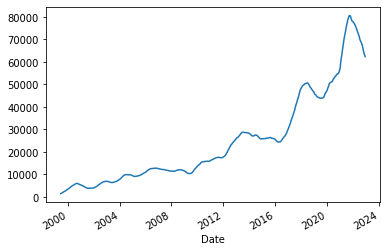

In [114]:
se.rolling(200).mean().Close.dropna().plot()

In [115]:
!pip install pyupbit -q

     |████████████████████████████████| 106 kB 8.2 MB/s 


In [116]:
import pyupbit
# https://pyupbit.readthedocs.io/en/latest/
pyupbit.get_ohlcv()

,open,high,low,close,volume,value
2022-05-27 09:00:00,37662000.0,37889000.0,36413000.0,36837000.0,4373.885371,1.620369e+11
2022-05-28 09:00:00,36862000.0,37373000.0,36613000.0,37034000.0,1931.845973,7.136116e+10
2022-05-29 09:00:00,37033000.0,37620000.0,36825000.0,37380000.0,1712.650146,6.369122e+10
2022-05-30 09:00:00,37415000.0,39989000.0,37230000.0,39550000.0,5467.460037,2.112747e+11
2022-05-31 09:00:00,39527000.0,40600000.0,39300000.0,39923000.0,6442.979981,2.563085e+11
...,...,...,...,...,...,...
2022-12-08 09:00:00,22544000.0,23000000.0,22484000.0,22918000.0,2658.301222,6.023865e+10
2022-12-09 09:00:00,22918000.0,23000000.0,22770000.0,22849000.0,2349.726274,5.371503e+10
2022-12-10 09:00:00,22845000.0,22940000.0,22820000.0,22831000.0,1339.765766,3.064659e+10
2022-12-11 09:00:00,22824000.0,22915000.0,22760000.0,22775000.0,1591.849025,3.635057e+10
